In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import gmaps
import api_key
from datetime import date
gmaps.configure(api_key=api_key.API_KEY)
pd.__version__, gmaps.__version__

('1.0.1', '0.9.0')

In [4]:
c_data = pd.read_csv("covid19_cleaned.csv")

C:\Users\dpale\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3063: DtypeWarning: Columns (2,3,10,11,13,14,15,16,17,18,20,22,23,24,25,26,27,28,32,33) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [5]:
date_confirms = c_data
date_confirms["data_confirmation"] = pd.to_datetime(c_data["date_confirmation"], format="%d.%m.%Y")

In [13]:
date_confirms["data_confirmation"]

0         2020-02-14
1         2020-02-21
2         2020-02-14
3         2020-01-26
4         2020-02-14
             ...    
2310106   2020-04-20
2310107   2020-04-20
2310108   2020-04-20
2310109   2020-04-20
2310110   2020-04-20
Name: data_confirmation, Length: 2310111, dtype: datetime64[ns]

In [6]:
# Earliest and latest confirmations in our data.
min(date_confirms["data_confirmation"]), max(date_confirms["data_confirmation"])

(Timestamp('2020-01-06 00:00:00'), Timestamp('2020-06-03 00:00:00'))

In [7]:
# Start by looking at case counts by country.
c_countries = c_data.dropna(subset=["country"])

In [8]:
c_country_grouped= c_data.groupby(["country"]).count()
c_country_grouped

,Unnamed: 0,ID,age,sex,city,province,latitude,longitude,geo_resolution,date_onset_symptoms,...,admin3,admin2,admin1,country_new,admin_id,data_moderator_initials,travel_history_binary,hospitalized,deceased,data_confirmation
country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,8,8,2,2,0,8,8,8,8,0,...,0,0,8,8,8,0,4,8,8,8
Algeria,1267,1267,22,32,1239,1243,1267,1267,1267,1,...,0,0,4,29,1267,0,1253,1267,1267,1267
Andorra,1,1,1,1,0,0,1,1,1,0,...,0,0,0,1,1,0,0,1,1,1
Angola,4,4,3,2,4,0,4,4,4,1,...,0,0,0,4,4,0,4,4,4,4
Argentina,1137,1137,31,31,342,792,1137,1137,1137,3,...,0,0,339,380,1137,0,1130,1137,1137,1137
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Venezuela,2,2,2,2,2,2,2,2,2,0,...,0,0,0,0,2,0,0,2,2,2
Vietnam,34,34,34,34,28,30,34,34,34,16,...,0,18,32,34,34,0,17,34,34,34
"Virgin Islands, U.S.",2,2,0,0,0,0,2,2,2,0,...,0,0,0,2,2,0,1,2,2,2


Text(0, 0.5, 'Country')

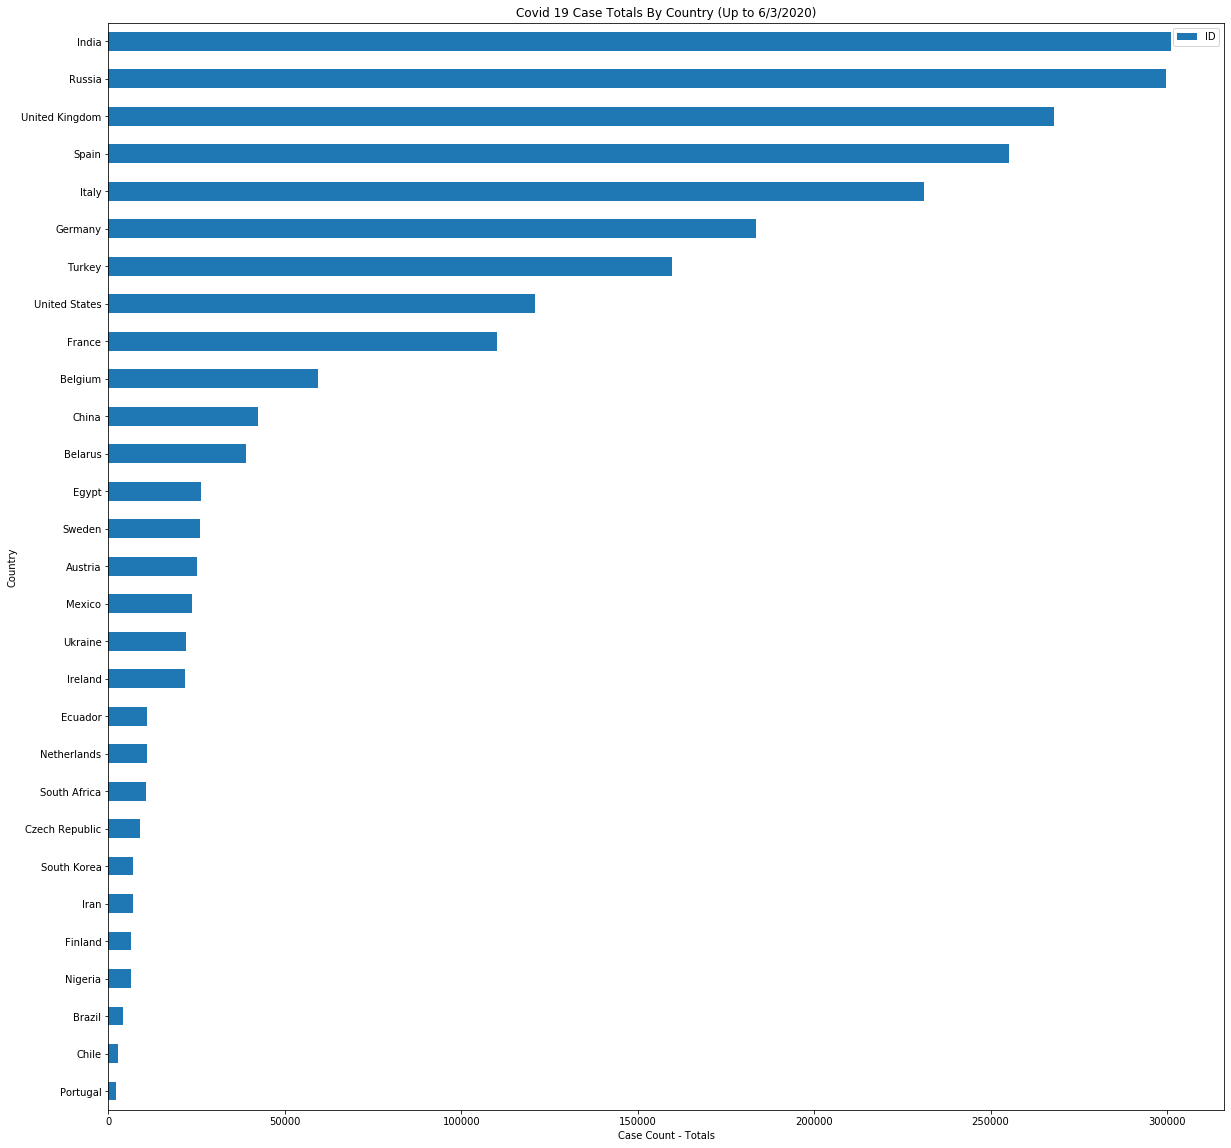

In [9]:
c_large_countries = c_country_grouped.loc[c_country_grouped["ID"] > 2000]
ax = c_large_countries.sort_values(by="ID").plot(kind="barh", 
                                            y="ID", 
                                            figsize=(20, 20),
                                            title="Covid 19 Case Totals By Country (Up to 6/3/2020)",
                                           )
ax.set_xlabel("Case Count - Totals")
ax.set_ylabel("Country")

In [10]:
no_null_coords = c_data.dropna(subset=["latitude", "longitude"])
locations = no_null_coords[['latitude', 'longitude']]
fig = gmaps.figure()
fig.add_layer(gmaps.heatmap_layer(locations))
fig


Figure(layout=FigureLayout(height='420px'))

In [11]:
c_data["travel_history_dates"].value_counts()

21.01.2020                                         114
22.01.2020                                          99
15.03.2020                                          97
14.03.2020                                          92
20.01.2020                                          88
                                                  ... 
17.03.2020-19.03.2020                                1
31.03.2020                                           1
08.03.2020 - 17.03.2020                              1
14.01.2020 - 15.01.2020                              1
01.12.2019 - 31.12.2019;17.01.2020 - 02.02.2020      1
Name: travel_history_dates, Length: 206, dtype: int64